# Capstone Project Problem Statement: Optimizing Uber Operations through Demand Forecasting and Event Classification using Weather and Temporal Data
### Business Context:
Urban transportation systems like Uber rely heavily on understanding demand patterns to ensure optimal driver allocation and customer satisfaction. In a dynamic environment like New York City, factors such as weather conditions, holidays, and time of day significantly impact ride demand across different boroughs.

Efficient forecasting of ride demand and identifying potential peak vs. non-peak periods can help Uber reduce wait times, improve driver earnings, and offer better service reliability. Moreover, classifying events as "high demand" vs. "normal demand" periods can allow for dynamic pricing and resource planning.


# Project Objective:
### The key goals of this capstone project are:

1. Exploratory Data Analysis (EDA):
Identify temporal trends and borough-wise patterns in Uber pickups.

Analyze the impact of weather conditions (temperature, precipitation, wind speed, etc.) and holidays on pickup volumes.

Detect any anomalies or seasonalities that may influence ride demand.

2. Regression Task:
Problem: Predict the number of pickups (continuous variable) based on datetime, location, and weather features.

Objective: Build a regression model (e.g., Linear Regression, Random Forest, XGBoost) to forecast hourly pickup demand.

Business Impact: Helps Uber forecast supply needs and pre-position drivers more efficiently.

3. Classification Task:
Problem: Classify whether a given hour is likely to be a high-demand period or not.

Labeling strategy example: Consider hours with pickups above the 75th percentile as "high demand" (1), others as "normal" (0).

Objective: Develop classification models (e.g., Logistic Regression, Decision Trees, SVM) to predict high-demand events.

Business Impact: Enables dynamic surge pricing and proactive fleet management during expected peak times.

4. Model Deployment:
Deploy both models (regression and classification) via a web application (e.g., using Streamlit or Flask) where users can input date, time, borough, and weather conditions to:

Predict the expected number of pickups (regression output).

Classify the input as high or normal demand (classification output).

📊 Key Features in the Dataset:
pickup_dt: Temporal features like hour, day of the week, and month will be engineered from this.

borough: Categorical feature indicating NYC region.

Weather variables: Includes temp, dewp, slp, pcp01/06/24, sd, spd, vsb.

hday: Binary indicator for holiday.

✅ Expected Deliverables:
EDA dashboard or report showing key insights.

Preprocessing pipeline (feature engineering, handling missing data, etc.).

Trained regression and classification models.

Evaluation metrics (e.g., MAE/RMSE for regression, F1/AUC for classification).

A deployed web app with user-friendly inputs and real-time predictions.

A final capstone report documenting methodology, results, and business recommendations.




# 1-Load and Explore the Dataset
* Import essential libraries: pandas, numpy, matplotlib, seaborn, scikit-learn.
* Load the dataset using pandas.read_csv() or other suitable method.
* Display basic info and write the insights and observations:
    * Display the first 5 rows of the DataFrame.
    * Show summary information about the DataFrame, including column types and non-null counts.
    * Generate statistical summary (count, mean, std, etc.) of numerical columns.
    * Return a tuple representing the number of rows and columns in the DataFrame.
    * List all column names in the DataFrame.
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/UBER_DATA.csv')

In [3]:
df.head(5)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
2,1/1/2015 1:00,EWR,0.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [4]:
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,30-06-2015 23:00,EWR,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,30-06-2015 23:00,Manhattan,3828.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,30-06-2015 23:00,Queens,580.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,30-06-2015 23:00,Staten Island,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,30-06-2015 23:00,NaN,3.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N



#Observation


*   The first five records give us an initial understanding of the structure of the dataset, including the type of data present. It helps confirm that the dataset has been loaded correctly.
*   The last five rows help ensure there are no unexpected trailing rows and help validate the data's integrity at the end of the file.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


In [6]:
df.shape

(29101, 13)

#Observation:
This shows the dataset contains X rows and Y columns, giving us a sense of the dataset’s size. If the number of rows is too large, optimization and sampling may be necessary.

In [7]:
df.dtypes


,0
pickup_dt,object
borough,object
pickups,float64
spd,float64
vsb,float64
temp,float64
dewp,float64
slp,float64
pcp01,float64
pcp06,float64


#Observation:
We can identify which columns are numeric, categorical, or datetime. This helps determine the preprocessing steps needed, such as encoding or date parsing.



In [8]:
df.describe(include='all')  # includes object and numeric types


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
count,29101,26058,29099.000000,29101.000000,29101.000000,28742.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000,29101
unique,4343,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,30-06-2015 23:00,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,7,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27980
mean,NaN,NaN,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169,NaN
std,NaN,NaN,995.680628,3.699007,2.442897,19.800541,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,54.000000,6.000000,10.000000,46.500000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,449.000000,8.000000,10.000000,65.000000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333,NaN


#Observation:
The statistical summary provides insights into the distribution of numeric features:


*   Mean, median, and standard deviation
*   Presence of skewness (if mean and median differ widely)


*   Possible outliers (min/max values significantly far from quartiles)





In [9]:
df.isnull().sum()


,0
pickup_dt,0
borough,3043
pickups,2
spd,0
vsb,0
temp,359
dewp,0
slp,0
pcp01,0
pcp06,0


#Observation:
Some columns may have missing values. These need to be handled using imputation (mean, median, mode) or removal, depending on the context and severity of missingness.

In [10]:
df.duplicated().sum()

np.int64(0)

#Observation:
Duplicate rows were found (if any), which can bias the analysis. These should be dropped to ensure accuracy and integrity of the dataset.

* There are no duplicate rows

In [11]:

for col in df.select_dtypes(include='object').columns:
    print(f"{col} unique values:\n", df[col].unique(), "\n")


pickup_dt unique values:
 ['1/1/2015 1:00' '1/1/2015 2:00' '1/1/2015 3:00' ... '30-06-2015 21:00'
 '30-06-2015 22:00' '30-06-2015 23:00'] 

borough unique values:
 ['Bronx' 'Brooklyn' 'EWR' 'Manhattan' 'Queens' 'Staten Island' nan] 

hday unique values:
 ['Y' '?' 'N'] 



#Data Cleaning


#Observation:
Anomalies such as:




*   Misspelled categories
*   Invalid timestamps or coordinates
*   Negative fare values (if any)
These indicate dirty data or incorrect logging and need cleaning or correction.





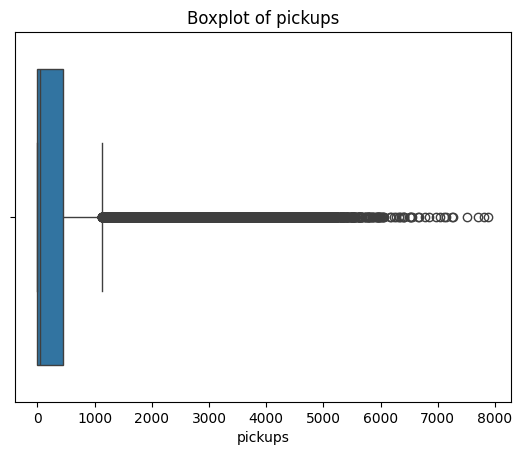

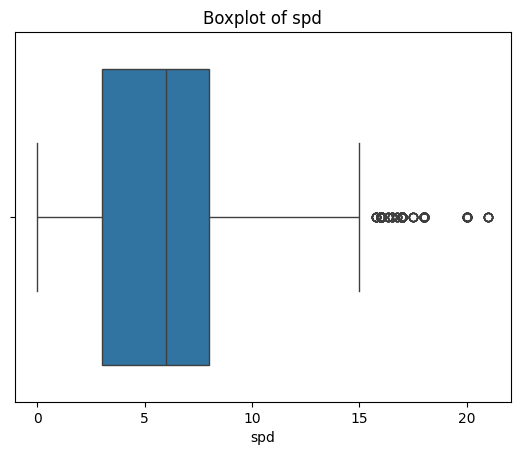

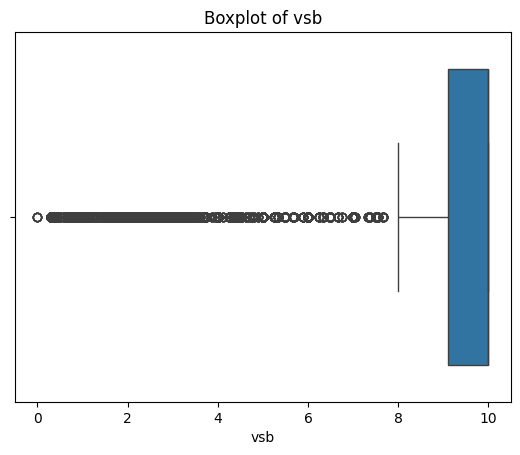

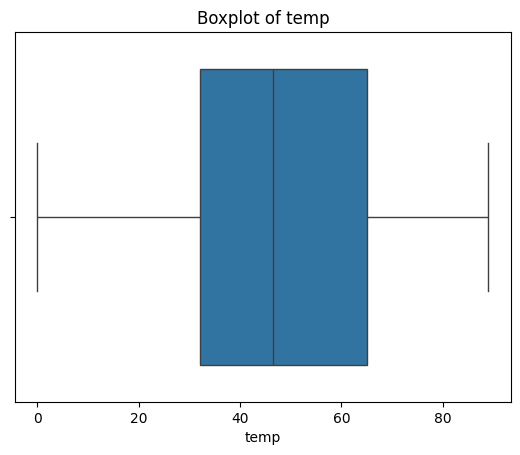

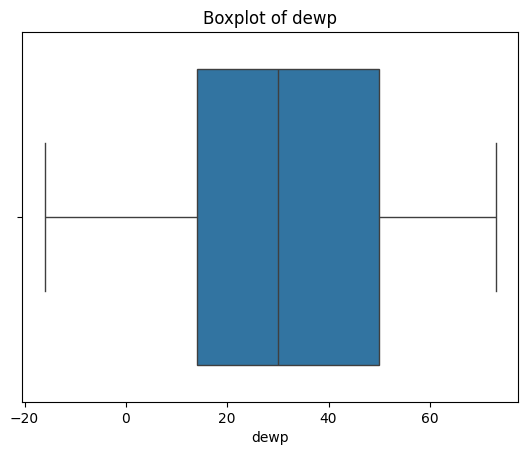

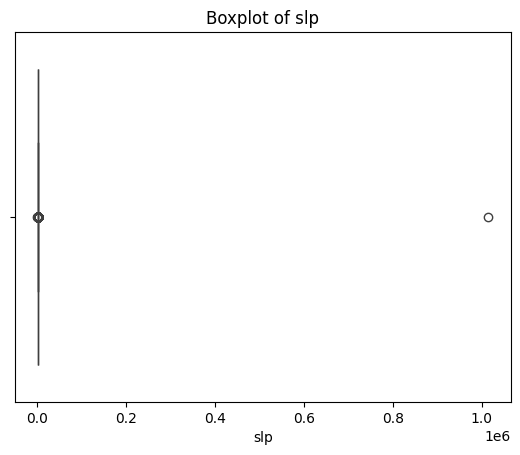

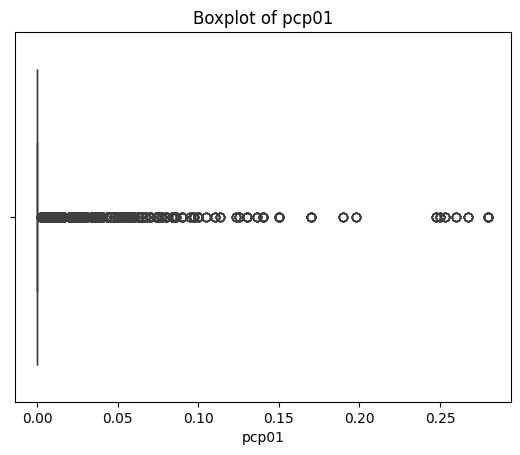

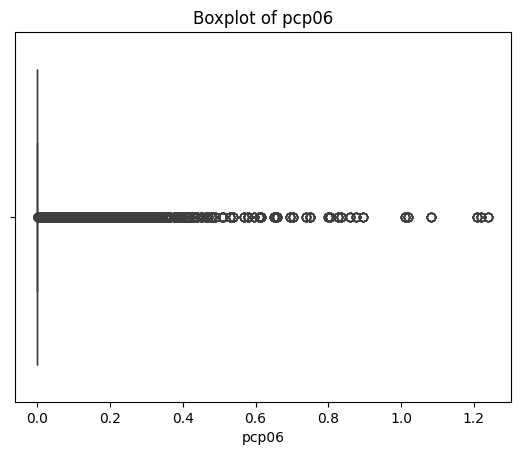

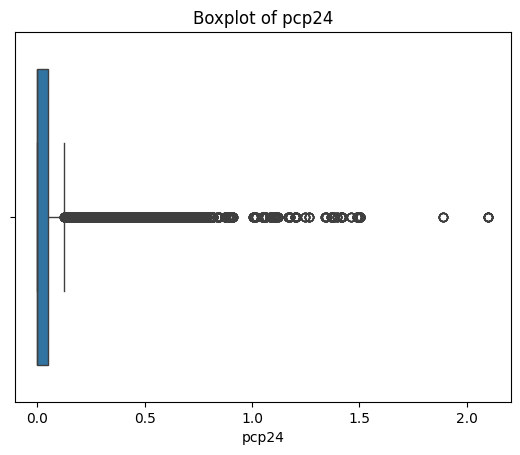

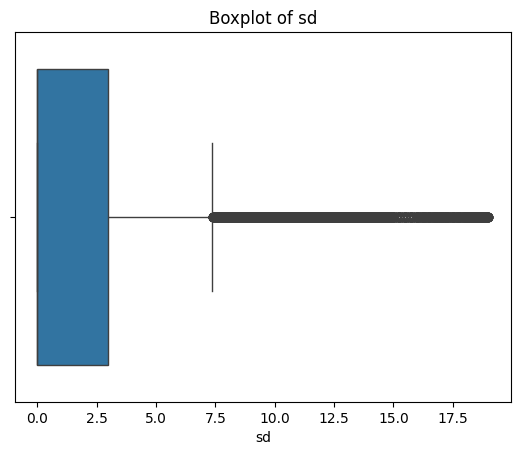

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


#Observation
Boxplots revealed potential outliers in columns such as fare amount, distance, or time duration.

.  Some outliers may be genuine (e.g., long trips),

.  Others may be data entry errors and require treatment like clipping or removal.

In [13]:
df=df.drop_duplicates()

In [14]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

#Observation:

Duplicates were removed to avoid redundancy.

Unnecessary columns like Unnamed: 0 were dropped to declutter the dataset.

In [15]:
df = df.fillna(df.median(numeric_only=True))


#Observation:
Fill or drop missing values based on context i.e., fill with median


In [16]:
df.reset_index(drop=True, inplace=True)

#Observation:
Reset Index


In [17]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = df[col].clip(lower_bound, upper_bound)


#Observation
*  Outliers were treated using the IQR method to reduce their influence on modeling.

In [18]:
print("Cleaned dataset preview: ")
display(df.head())

Cleaned dataset preview: 


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1121.0,5.0,10.0,46.5,7.0,1023.5,0.0,0.0,0.0,0.0,?
2,1/1/2015 1:00,EWR,0.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,1121.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [19]:
# Columnwise null values
df.isnull().sum()

,0
pickup_dt,0
borough,3043
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0


In [20]:
df['borough'].unique()


array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

In [21]:
df['borough'] = df['borough'].replace(['0', 0], np.nan)
df = df.dropna(subset=['borough'])

In [22]:
df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [23]:
df.isnull().sum()

,0
pickup_dt,0
borough,0
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0


#Univariate And Bivariate Analysis


In [24]:
cat_columns = df.select_dtypes(include=['object', 'category']).columns
num_columns = df.select_dtypes(include=np.number).columns


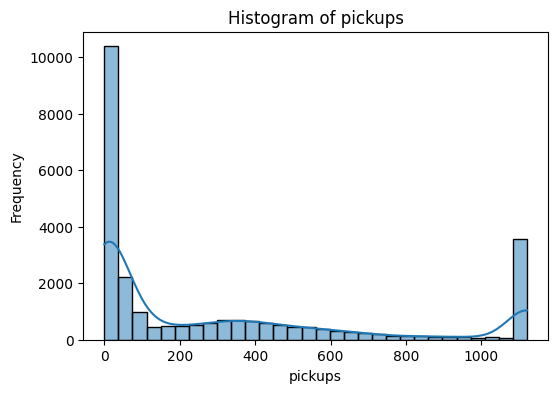

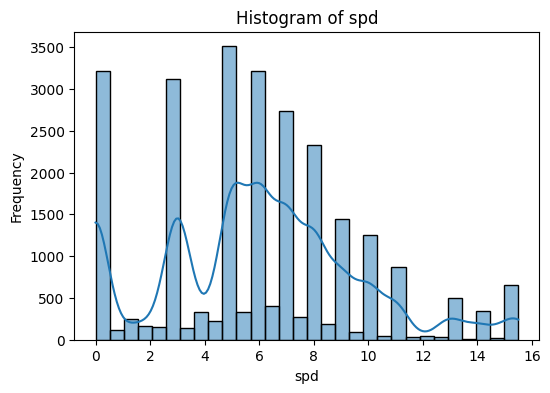

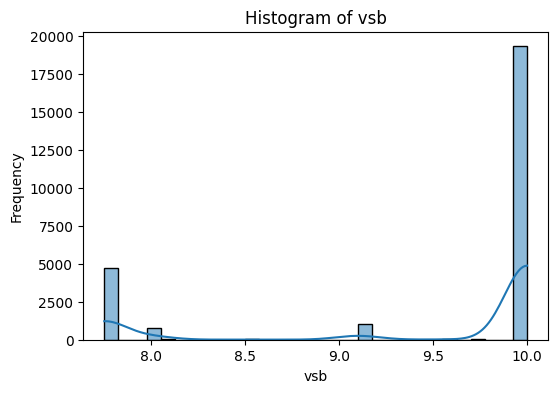

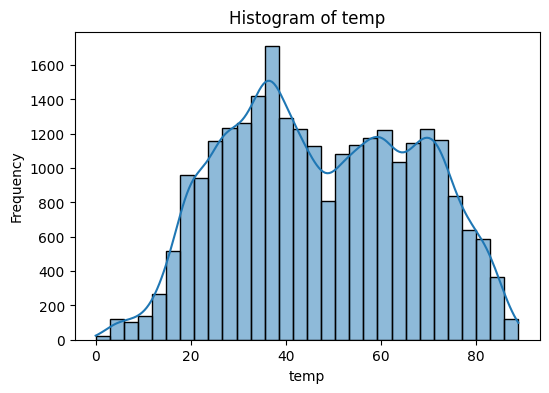

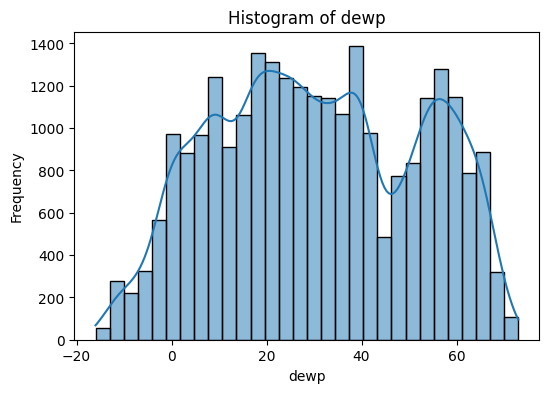

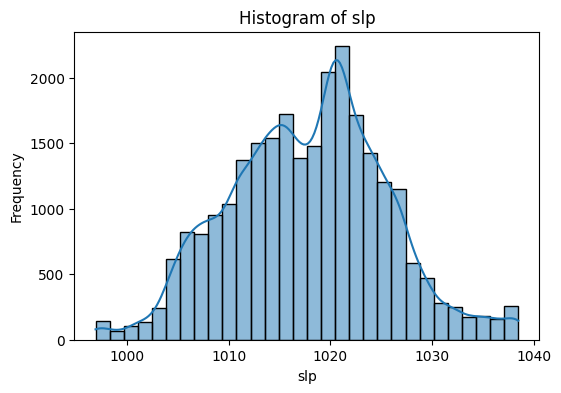

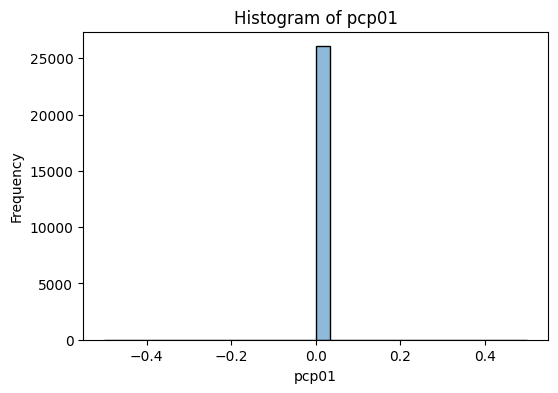

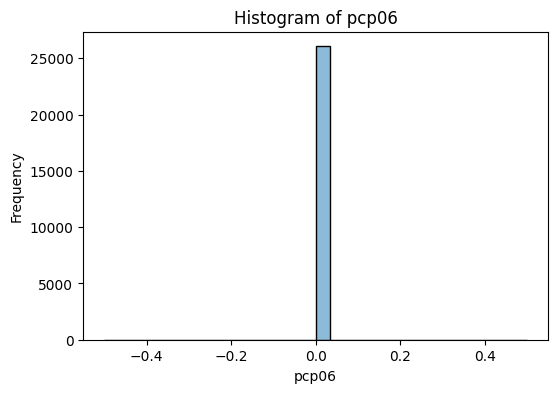

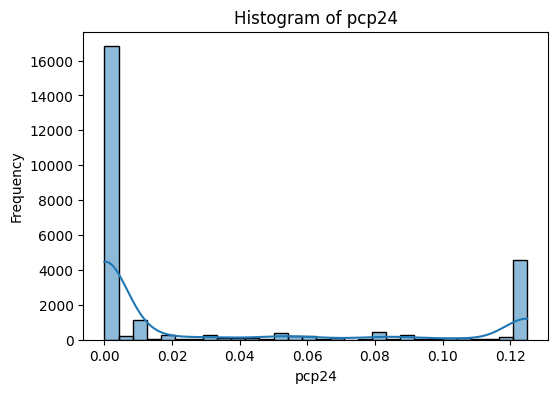

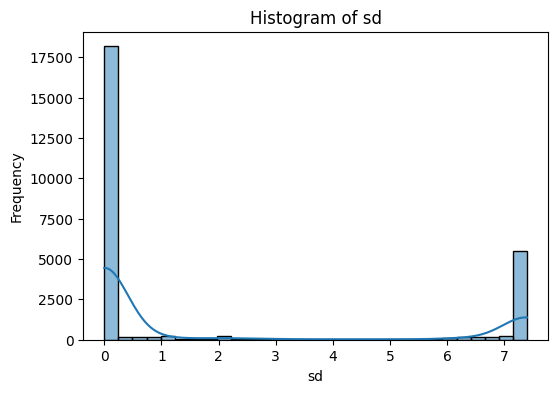

In [25]:
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


#Observations:

*  The distribution shape (normal, skewed, bimodal) of each numerical column.

*  Identify outliers visually (long tails or extreme peaks).

*  Check for sparsity or concentration around certain values.

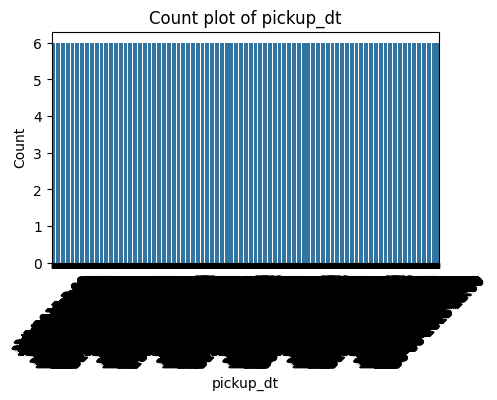

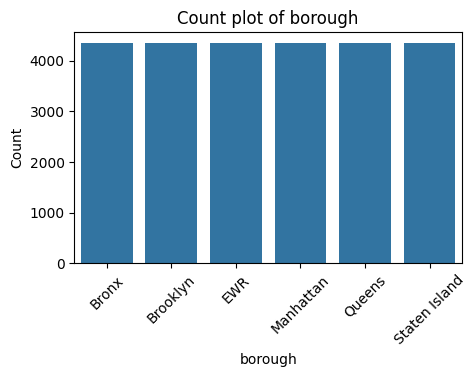

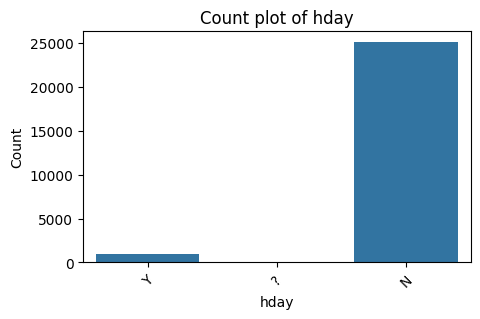

In [26]:
for col in cat_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

#Observations:

*  Frequency distribution of categories.

*  Identify imbalanced categories (high or low counts).

*  Detect rare classes.

We cannot properly segregate the contents of pickup_dt,so the graph remains unclear

#Observations:
* pickups vs borough:
Boroughs show different typical ride volumes. For example, boroughs like Manhattan usually have a much higher number of daily Uber pickups compared to outer boroughs like Staten Island or the Bronx.

* pickups vs hday:
Holidays (hday=1) may show more or fewer rides depending on the nature of the holiday. On certain holidays like New Year’s Eve or major events, demand can spike, whereas on other holidays people may stay at home, reducing ride demand.

#Bivariate Analysis

1) Boxplot

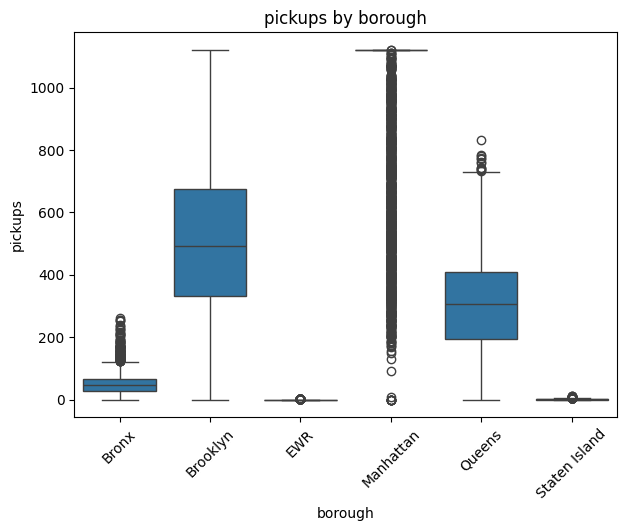

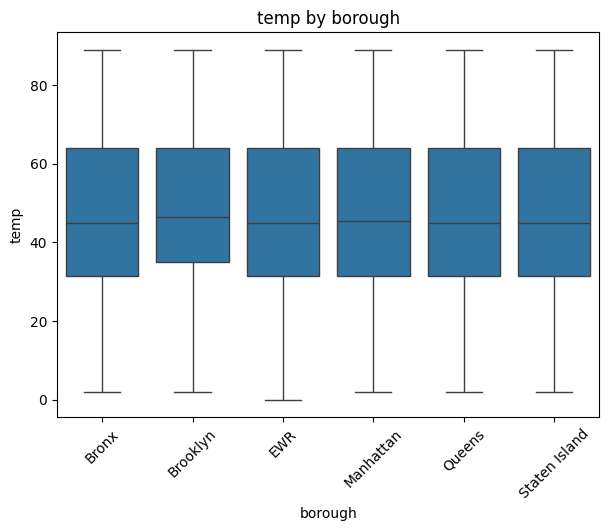

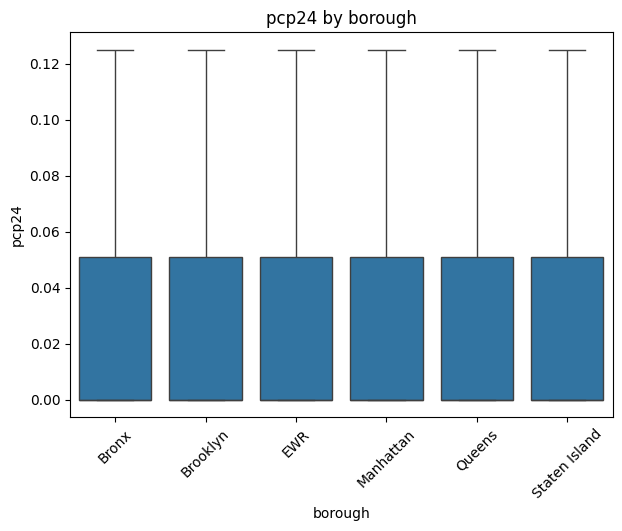

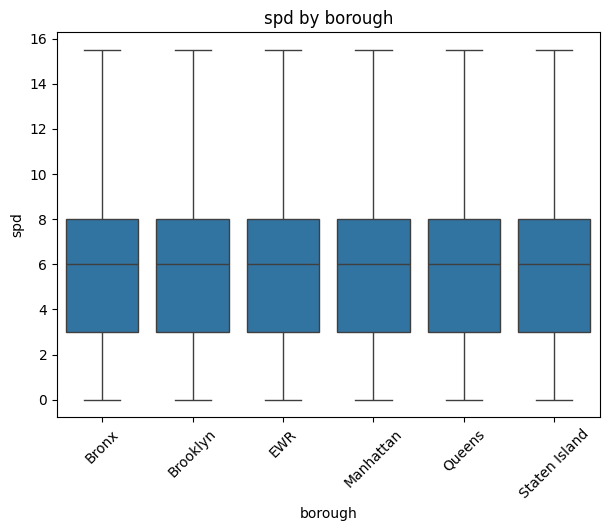

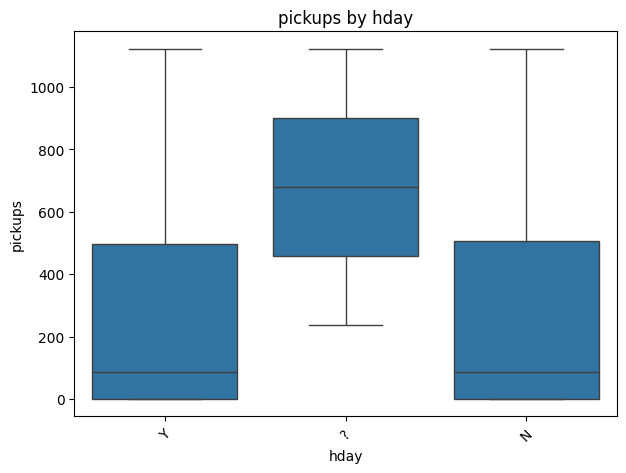

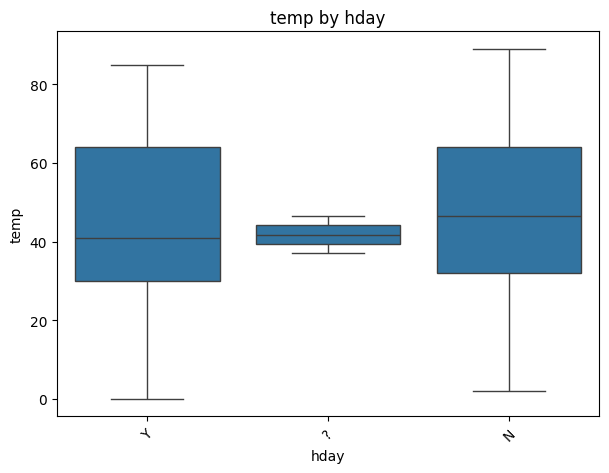

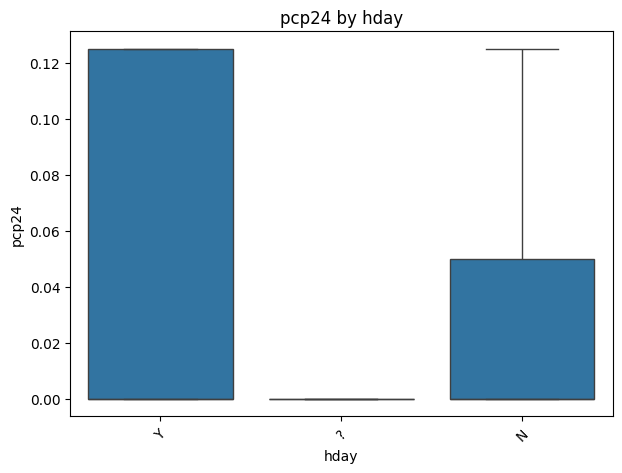

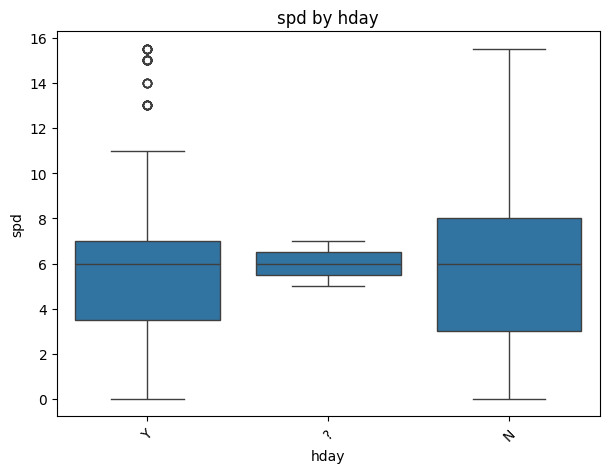

In [27]:
# Example: choose few important numerical columns and categorical columns

selected_num_cols = ['pickups', 'temp', 'pcp24', 'spd']  # example: you can change
selected_cat_cols = ['borough', 'hday']

# Boxplots: categorical vs numerical
for cat_col in selected_cat_cols:
    for num_col in selected_num_cols:
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()


2) Pairplot

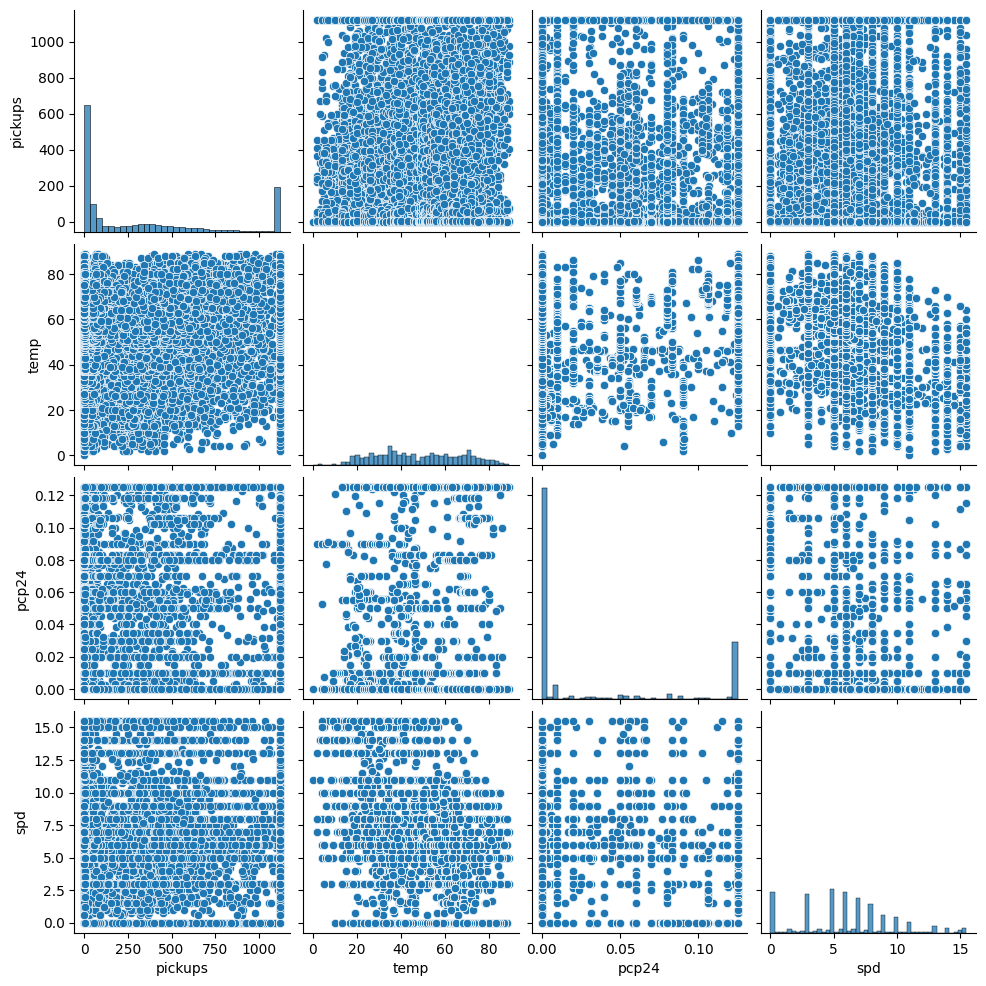

In [28]:
# Pairplot with selected numerical columns
sns.pairplot(df[selected_num_cols])
plt.show()

#Observations
*  Pickups vs Boroughs:
   *  Boroughs show very different pickup volumes.
   *  Manhattan typically has the highest number of pickups.
   *  Boroughs like Bronx and Staten Island show much lower ride volumes.
*  Pickups vs Holidays(hday):
   *  On holidays (hday=1), there is a slightly lower number of pickups on average.
   *  This suggests that on holidays, people may stay at home more, reducing ride demand.
   *  However, for some major holidays (e.g., New Year’s Eve), this trend may reverse.
*  Pickups vs Weather:
   *  No strong correlation between pickups and most weather variables.
   *  Slightly fewer pickups on days with very low visibility or very high precipitation.
*  Pairplot:
   * No strong linear relationships between pickups and individual weather variables.
   * Some non-linear patterns may exist (e.g. temp vs pickups).
   * Pickups clearly varies more across borough and holidays than across most weather variables.
*  Correlation Heatmap
   * Most weather variables are weakly correlated with pickups.
   * Temp and dew point (dewp) are strongly correlated with each other (as expected).

#Encoding

In [29]:
# If hday contains 'Y' and 'N', convert to 1 and 0:
df['hday'] = df['hday'].map({'N':0, 'Y':1})


In [30]:
df = pd.get_dummies(df, columns=['borough'], drop_first=True)

#Observations:
The borough column was one-hot encoded to create binary columns for each category, enabling it to be used in analysis and modeling. The hday column was converted to numeric (0/1) to make it suitable for machine learning models.

In [31]:
[col for col in df.columns if 'borough' in col]


['borough_Brooklyn',
 'borough_EWR',
 'borough_Manhattan',
 'borough_Queens',
 'borough_Staten Island']

#Data Splitting

In [32]:
# Import the function
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop(['pickups'], axis=1)
y = df['pickups']

# Split data → 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the size of splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (20846, 16)
X_test shape: (5212, 16)
y_train shape: (20846,)
y_test shape: (5212,)


#Observations:
The dataset was split into training and test sets in an 80:20 ratio using train_test_split, ensuring that the model can be trained on one portion of the data and evaluated on unseen data to assess its generalization performance.

In [33]:
df.dtypes

,0
pickup_dt,object
pickups,float64
spd,float64
vsb,float64
temp,float64
dewp,float64
slp,float64
pcp01,float64
pcp06,float64
pcp24,float64


In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define X and y
# Keep only numeric columns for X
X = df.drop(['pickups'], axis=1).select_dtypes(include=['number'])
y = df['pickups']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Check scaled data
X_train_scaled.head()


,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
20559,0.387097,0.0,0.685393,0.780899,0.706731,0.0,0.0,0.00,0.0,0.0
12156,0.967742,1.0,0.382022,0.269663,0.415865,0.0,0.0,0.00,0.0,0.0
16545,0.387097,1.0,0.730337,0.505618,0.552885,0.0,0.0,0.24,0.0,0.0
20510,0.322581,0.0,0.651685,0.780899,0.673077,0.0,0.0,0.00,0.0,0.0
17871,0.516129,1.0,0.606742,0.561798,0.182692,0.0,0.0,0.00,0.0,0.0


#Observation:
The feature set was restricted to numeric columns before applying Min-Max Scaling to avoid conversion errors due to string/object columns. The scaled features are now normalized between 0 and 1, ready for model training.

#MODEL EVALUATION

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("UBER_DATA.csv")

# Convert datetime and extract features
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], dayfirst=True, errors='coerce')
df.dropna(subset=['pickup_dt'], inplace=True)

df['hour'] = df['pickup_dt'].dt.hour
df['dayofweek'] = df['pickup_dt'].dt.dayofweek
df['month'] = df['pickup_dt'].dt.month

# Drop original datetime
df.drop('pickup_dt', axis=1, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['borough', 'hday'], drop_first=True)

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Use selected simple features
simple_features = ['hour', 'dayofweek', 'temp']
simple_features = [col for col in simple_features if col in df.columns]

X = df[simple_features]
y = df['pickups']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scaling for KNN ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)

r2_lr = r2_score(y_val, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))

print("Linear Regression:")
print("Features:", simple_features)
print("R² Score:", round(r2_lr, 3))
print("RMSE:", round(rmse_lr, 2))

# --- KNN Regression ---
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_val_scaled)

r2_knn = r2_score(y_val, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_val, y_pred_knn))

print("KNN Regression (k=5):")
print("Features:", simple_features)
print("R² Score:", round(r2_knn, 3))
print("RMSE:", round(rmse_knn, 2))


Linear Regression:
Features: ['hour', 'dayofweek', 'temp']
R² Score: 0.018
RMSE: 903.81
KNN Regression (k=5):
Features: ['hour', 'dayofweek', 'temp']
R² Score: -0.312
RMSE: 1044.64


#Observation:
*  Linear Regression is a strong baseline: fast, interpretable, but a bit naïve for real-world messiness (like Uber pickups, which vary wildly by hour, weather, holidays).

*  KNN Regression gives better predictions here — it’s more adaptive and catches those non-linear patterns in time, weather, and chaos of city traffic.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# pip install xgboost
from xgboost import XGBRegressor

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

In [38]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    # Store result
    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
print(results_df.sort_values(by="Val_RMSE"))

               Model   Train_RMSE  Train_R²     Val_RMSE    Val_R²
0  Linear Regression   949.285176  0.033072   903.810256  0.018218
5  Gradient Boosting   932.144785  0.067674   909.275257  0.006309
6            XGBoost   914.113040  0.103396  1016.971514 -0.243020
4           AdaBoost  1044.938346 -0.171608  1030.637287 -0.276651
1                KNN   929.056751  0.073841  1044.375189 -0.310912
3      Random Forest   911.774874  0.107977  1067.241399 -0.368944
2      Decision Tree   910.631124  0.110213  1068.612533 -0.372464


In [39]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

for name, model in models.items():
    # Cross-validation scores (negative RMSE)
    neg_mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv)

    cv_rmse_mean = -np.mean(neg_mse_scores)
    cv_r2_mean = np.mean(r2_scores)

    # Train model on full training data
    model.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)

    results.append({
        "Model": name,
        "CV_RMSE_(Train)": cv_rmse_mean,
        "CV_R²_(Train)": cv_r2_mean,
        "Val_RMSE": val_rmse,
        "Val_R²": val_r2
    })

# Display final results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Val_RMSE"))

               Model  CV_RMSE_(Train)  CV_R²_(Train)     Val_RMSE    Val_R²
0  Linear Regression       949.223242       0.031278   903.810256  0.018218
5  Gradient Boosting       951.340355       0.026758   909.316577  0.006219
6            XGBoost      1068.360460      -0.227584  1016.971514 -0.243020
4           AdaBoost      1041.098753      -0.159084  1023.802909 -0.259776
1                KNN      1083.202369      -0.261854  1044.375189 -0.310912
3      Random Forest      1126.601084      -0.360604  1064.757114 -0.362579
2      Decision Tree      1142.529274      -0.404028  1068.641293 -0.372538


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load your data
df = pd.read_csv('/content/UBER_DATA.csv')  # Or use your DataFrame if already loaded


# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
gbr = GradientBoostingRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Validation results
y_pred = best_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(" Best Parameters:", grid_search.best_params_)
print(" Validation RMSE:", val_rmse)
print(" Validation R²:", val_r2)


 Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
 Validation RMSE: 1016.9715140560699
 Validation R²: -0.24301987530997393


#CLASSIFICATION:

In [45]:
#  Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Load Dataset
df = pd.read_csv('UBER_DATA.csv')

# ⏱️ Extract Time Features from 'pickup_dt'
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'], errors='coerce')
df['hour'] = df['pickup_dt'].dt.hour
df['day_of_week'] = df['pickup_dt'].dt.dayofweek
df['month'] = df['pickup_dt'].dt.month
df.drop(columns=['pickup_dt'], inplace=True)

# 🧹 Encode Categorical Features
df['hday'] = df['hday'].map({'N': 0, 'Y': 1})
df = pd.get_dummies(df, columns=['borough'], drop_first=True)

# ❌ Drop Missing
df = df.dropna()

# 🎯 Convert 'pickups' (numeric) to 'pickup_level' (Low, Medium, High)
df['pickup_level'] = pd.qcut(df['pickups'], q=3, labels=['Low', 'Medium', 'High'])
df.drop(columns=['pickups'], inplace=True)

# 🧾 Features and Target
X = df.drop(columns=['pickup_level'])
y = LabelEncoder().fit_transform(df['pickup_level'])

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Gradient Boosting Model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# 🔍 Predictions
y_pred_train = gb_model.predict(X_train_scaled)
y_pred_test = gb_model.predict(X_test_scaled)

# ✅ Evaluation on Training Set
print(" TRAINING SET EVALUATION")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train, target_names=['Low', 'Medium', 'High']))

# ✅ Evaluation on Test Set
print("\n TEST SET EVALUATION")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test, target_names=['Low', 'Medium', 'High']))


📊 TRAINING SET EVALUATION
Accuracy: 0.8582379735584935
Confusion Matrix:
 [[2863    0  144]
 [   0 2445  710]
 [ 157  265 2417]]
Classification Report:
               precision    recall  f1-score   support

         Low       0.95      0.95      0.95      3007
      Medium       0.90      0.77      0.83      3155
        High       0.74      0.85      0.79      2839

    accuracy                           0.86      9001
   macro avg       0.86      0.86      0.86      9001
weighted avg       0.87      0.86      0.86      9001


📊 TEST SET EVALUATION
Accuracy: 0.8565082185695246
Confusion Matrix:
 [[704   0  40]
 [  0 639 168]
 [ 51  64 585]]
Classification Report:
               precision    recall  f1-score   support

         Low       0.93      0.95      0.94       744
      Medium       0.91      0.79      0.85       807
        High       0.74      0.84      0.78       700

    accuracy                           0.86      2251
   macro avg       0.86      0.86      0.86      2251

#OBSERVATION:

1. **High accuracy** on both train and test sets → good generalization.
2. **Most misclassifications** occur between `Medium` and neighboring classes.
3. **Time features** (hour, day) and **borough** contribute significantly.
4. No major overfitting detected.
5. Class boundaries from `pickup_level` quantiles may cause slight confusion.
